<a href="https://colab.research.google.com/github/inandout-kr/MachineLearning/blob/main/Ch_3-3_%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3-2. 특성공학과 규제

### 다중회귀

앞에서는 하나의 특성을 사용해 선형 회귀 모델을 훈련시킴.

여러 개의 특성을 사용한 선형 회귀를 다중 회귀(multiple regression)라고 부름.

즉, 1개의 특성을 사용한 선형 회귀는 직선을 학습하는 반면, 특성이 2개인 선형 회귀는 평면을 학습함. 3차원 이상은 상상하기 힘듦.


* 여기서는 **생선 길이 * 생선 높이**를 새로운 특성으로 만들 것임.
* 이렇게 기존 특성을 사용해 새로운 특성을 뽑아내는 작업을 **특성 공학(feature engineering)**이라고 부름.

In [ ]:
import pandas as pd
df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [ ]:
perch_full.shape

(56, 3)

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### 사이킷런 변환기(transformer)

특성을 만들거나 전처리하기 위한 클래스를 transformer라고 부름.

fit(), transform() 메서드를 제공해줌.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# 2개의 특성 2와 3으로 이루어진 샘플 적용

poly = PolynomialFeatures()  # 객체 생성
poly.fit([[2, 3]])  # 새롭게 만들 특성 조합을 찾음
print(poly.transform([[2, 3]]))  # 실제로 데이터를 변환

[[1. 2. 3. 4. 6. 9.]]


2개의 특성(원소)을 가진 샘플 [2, 3]이 6개의 특성을 가진 샘플 [1. 2. 3. 4. 6. 9.]으로 transform

PolynomialFeatures Class는 기본적으로 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가함.

- 1은 왜 추가되었을까?
  - $무게 = a * 길이 + b * 높이 + c * 두께 + d * 1$
  - 선형 방정식의 절편 = 항상 값이 1인 특성과 곱해지는 계수
  - 그러므로 특성은 (길이, 높이, 두께, 1)이 됨


그러나 사이킷런의 선형 모델은 자동으로 절편을 추가하므로, 굳이 여기서 만들어주지 않아도 됨. include_bias=False로 지정해 특성을 변환하자.

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))
# 절편을 위한 항(1)이 제거된 것을 확인할 수 있음
## 사실 이렇게 제거해주지 않아도 사이킷런이 알아서 절편 항을 무시함. 여기선 개념을 이해하기 위해 명시.

[[2. 3. 4. 6. 9.]]


이제 이 방식으로 train_input에 적용

In [ ]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276],
       [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
          41.4736,   23.6992,   13.5424],
       [  40.    ,   11.93  ,    7.11  , 1600.    ,  477.2   ,  284.4   ,
         142.3249,   84.8223,   50.5521],
       [  39.    ,   12.43  ,    7.35  , 1521.    ,  484.77  ,  286.65  ,
         154.5049,   91.3605,   54.0225],
       [  43.    ,   11.93  ,    7.28  , 1849.    ,  512.99  ,  313.04  

In [ ]:
train_input.shape

(42, 3)

In [ ]:
train_poly.shape

(42, 9)

In [ ]:
# 9개 특성이 어떻게 만들어졌는지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

항상 train set을 기준으로 test set을 변환하는 습관을 들이자!

### 다중 회귀 모델 훈련하기

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9903183436982124

In [ ]:
lr.score(test_poly, test_target)

0.9714559911594134

점수는 늘지 않았지만, 과소적합 문제는 이제 없다.

- 특성을 더 많이 추가하면 어떨까?

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)  # degree param으로 필요한 고차항의 최대 차수 지정. 여기선 5제곱

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [ ]:
train_poly.shape

(42, 55)

In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [ ]:
print(lr.score(test_poly, test_target))

-144.40579242684848


train set에선 거의 1에 가까운 점수. 그러나 test set에선 왜 이렇게 낮은 음수로 나올까?

- train set에 대해 거의 완벽하게 학습했기 때문
- 특성의 개수를 늘리면 선형 모델은 당연히 강력해짐
- **과대적합!**


+ train set의 sample 개수는 42개밖에 되지 않음. 그러나 특성은 55개이므로 완벽하게 학습하는 것이 당연.
  + Ex) 42마리의 참새를 맞추기 위해 딱 한 번 새총을 쏴야 한다면 참새 떼 중앙을 겨냥하여 맞출 가능성을 높여야 함. 그러나 55번이나 쏠 수 있다면 한 번에 하나씩 모든 참새를 맞출 수 있음.

### 규제

특성을 줄여보자.

**규제(regularization)**는 모델이 train set을 과도하게 학습하지 못하도록 훼방하는 것을 말함.

즉 모델이 train set에 과대적합되지 않도록 만듦.

선형 회귀 모델의 경우, 특성에 곱해지는 계수(or 기울기)의 크기를 작게 만드는 일.

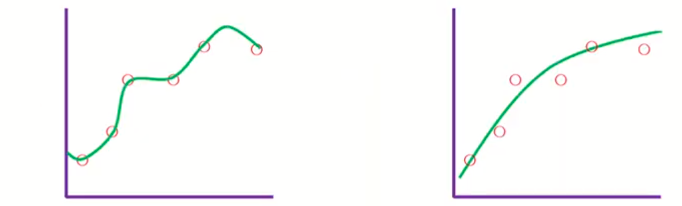

출처: https://velog.io/@mschoi0122/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0

일단 특성의 scale을 정규화해야 함. 그렇지 않으면 여기에 곱해지는 계수 값도 차이가 나게 됨.

선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않을 것.

1. 정규화
2. 규제

의 순서로 가보자. 이전에는 mean과 std를 구해서 특성을 표준점수로 바꾸었는데, 여기에서는 사이킷런에서 제공하는 StandardScaler Class를 사용해보자(이 class도 변환기의 하나).


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)  # 꼭 train set으로 학습한 변환기로 test set까지 변환해야 함

선형 회귀 모델에 규제를 추가한 모델을 **릿지(ridge)**와 **라쏘(lasso)**라고 부른다.

이 두 모델은 규제를 가하는 방법이 다름.
- 릿지: 계수를 제곱한 값을 기준으로 규제 적용
- 라쏘: 계수의 절댓값을 기준으로 규제 적용

일반적으로 릿지를 조금 더 선호. 두 알고리즘 모두 계수의 크기를 줄이지만, 라쏘는 아예 0으로 만들 수도 있음.

### 릿지 회귀


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
train_scaled.shape

(42, 55)

In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615397


In [ ]:
test_scaled.shape

(14, 55)

릿지, 라쏘 모델 사용 시, 규제의 양 조절 가능.

객체 만들 때 alpha param으로 조절.

- alpha 값이 크면 규제 강도가 세지므로 계수(기울기) 값을 더 줄이고 조금 더 과소적합되도록 유도.
- 작으면 과대적합될 가능성이 큼.



적절한 alpha 값을 찾는 방법?

- alpha 값에 대한 $R^2$ 값의 그래프를 그려보자.
- train set과 test set의 점수가 가장 가까운 지점이 최적의 alpha 값이 됨.

In [ ]:
train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)

    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    
    # 훈련 점수, 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

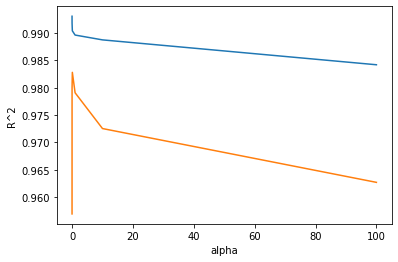

In [ ]:
import matplotlib.pyplot as plt

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

10배씩 늘렸기 때문에 상용로그 취해주자.

* np.log(): 자연상수 e를 밑으로 하는 자연로그
* np.log10(): 10을 밑으로 하는 상용로그

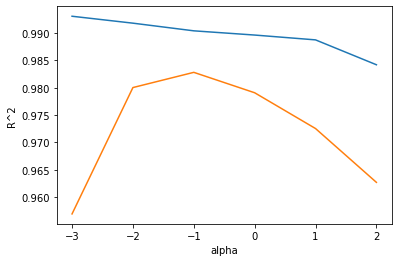

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

위가 train set, 아래가 test set

왼쪽은 점수 차이가 큼. train set에는 잘 맞고 test set에는 잘 맞지 않는 전형적인 과대적합.

두 그래프가 가장 가깝고, test set의 점수가 가장 높은 -1, 즉 $10^{-1} = 0.1$ 

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


과대적합과 과소적합 사이에서 균형이 잘 맞는 것을 확인 가능

### 라쏘 회귀


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha=alpha)

    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    
    # 훈련 점수, 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

warining이 뜨는 이유

라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 warning 발생. 반복 횟수를 충분히 늘리기 위해 max_iter 매개변수의 값을 10,000으로 지정하자.

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha=alpha, max_iter=100000)  # 10만으로 해보자

    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    
    # 훈련 점수, 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+03, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


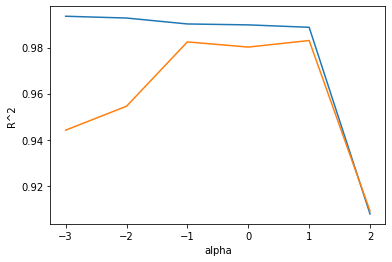

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

왼쪽은 과대적합, 오른쪽으로 갈 수록 점수 좁혀짐. 가장 오른쪽은 점수가 크게 떨어지므로, 분명 과소적합되는 모델.

최적의 alpha는 10($10^{1} = 10$).

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


결과: 특성을 많이 사용했지만, 릿지, 라쏘 모델이 과대적합을 잘 억제하고 test set의 성능을 크게 높임. 


그런데 라쏘 모델은 계수(기울기) 값을 아예 0으로 만들 수 있다고 앞서 언급한 바 있음. 라쏘 모델의 계수는 coef_ 속성에 저장되어 있음. 이 중 0인 것을 찾아보자.

In [ ]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        , 12.14852453, 55.44856399,
       42.23100799,  0.        ,  0.        , 13.70596191,  0.        ,
       43.2185952 ,  5.7033775 , 47.46254536,  7.42309425, 11.85823365,
        0.        ,  0.        , 13.53038193, 21.22111356,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       18.66993032,  0.        ,  0.        ,  0.        , 15.81041778,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 18.14672268,
        0.        ,  0.        ,  0.        ,  0.        , 15.51272953,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [ ]:
# np.sum()은 True를 1로, False를 0으로 인식. 따라서 비교 연산자에 맞는 원소 개수를 헤아리는 효과를 냄.
np.sum(lasso.coef_ == 0)

40

### 모델 과대적합 제어

이렇게 선형 회귀 알고리즘을 사용해 생선의 무게를 예측하는 모델을 훈련시켰지만, train set에 과소적합되는 문제가 발생했었음. 이를 위해 생선의 길이뿐만 아니라, 높이, 두께도 특성으로 사용하여 다중 회귀 모델을 훈련시켰음.

또한 가항 특성을 많이 추가해 train set에선 거의 완벽에 가까운 점수를 얻는 모델을 훈련함.

특성을 많이 추가하면 선형 회귀는 당연히 매우 강력한 성능을 냄. 그러나 특성이 너무 많으면 선형 회귀 모델을 제약하기 위한 도구가 필요한데, 이 규제 방법으로 **릿지 회귀**와 **라쏘 회귀**에 대해 배워보았다.

또한 릿지와 라쏘 모델의 규제 양을 조절하기 위해 최적의 alpha 값을 찾는 방법을 알아보았다.